## K-Means clustering

K-Means is an unsupervised machine learning algorithm used to group data points into clusters based on similarity.

--> "K" stands for the number of clusters you want to divide the data into.

--> "Means" refers to the mean (average) of the data points in a cluster (centroid).

we used elbow method in the backend 

In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("C:\\Users\\hardi\\OneDrive - wipro\\Desktop\\datasets\\mall - mall.csv")

In [18]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
df  = df .drop(columns = ['CustomerID' , 'Genre'])


In [10]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [12]:
x = df.iloc[:,[0,1]].values

In [14]:
from sklearn.cluster import KMeans

In [16]:
import matplotlib.pyplot as plt

C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

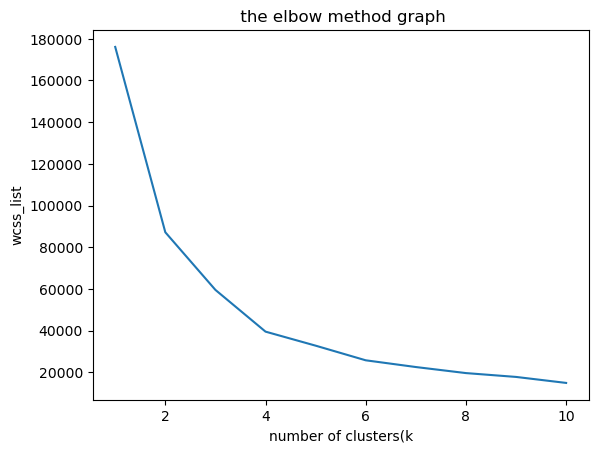

In [37]:
a = []

for i in range(1,11):
    b = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11) , a)

plt.title(" the elbow method graph")
plt.xlabel("number of clusters(k")
plt.ylabel("wcss_list")
plt.show()

## from the above plot, we can see the elbow point is at 4 . so the numbers of clusters here will be 4.

In [29]:
b = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
y_predict = b.fit_predict(x)

C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


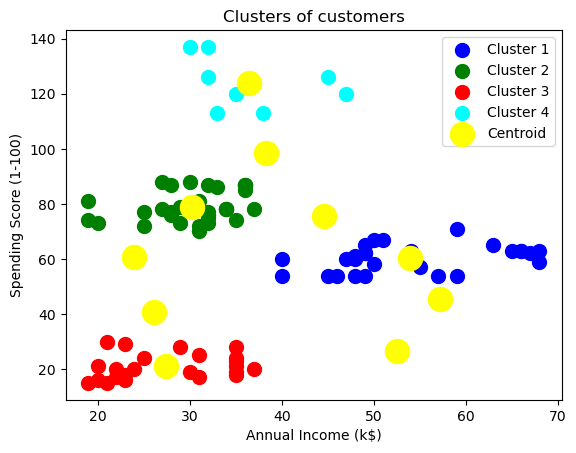

In [31]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4')

plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## PCA

In [41]:
df = pd.read_csv("C:\\Users\\hardi\\OneDrive - wipro\\Desktop\\datasets\\Social_Network_Ads - Social_Network_Ads.csv")

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [47]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
df = df.drop(columns = ['User ID' , 'Gender'])

In [63]:
x = df.drop(columns  = ['Purchased'], axis = 1)
y = df['Purchased']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

pipe = Pipeline([
    ('scaler' , StandardScaler()),
    ('pca' , PCA(n_components=2)),
    ('classifier' ,RandomForestClassifier(n_estimators=100 , random_state=42) )
])

In [67]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [69]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [71]:
y_pred = pipe.predict(x_test)

In [73]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [80]:
accuracy_score(y_test,y_pred)

0.8875

## covid data set

In [268]:
df = pd.read_csv("C:\\Users\\hardi\\OneDrive - wipro\\Desktop\\datasets\\covid_toy - covid_toy.csv")

In [270]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [272]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [274]:
from sklearn.impute import SimpleImputer

In [276]:
si = SimpleImputer()

In [278]:
df['fever']= si.fit_transform(df[['fever']])

In [280]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [282]:
from sklearn.preprocessing import LabelEncoder

In [284]:
lb = LabelEncoder()

In [286]:
df['gender']=lb.fit_transform(df['gender'])
df['cough']=lb.fit_transform(df['cough'])
df['city']=lb.fit_transform(df['city'])

In [288]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,No
1,27,1,100.0,0,1,Yes
2,42,1,101.0,0,1,No
3,31,0,98.0,0,2,No
4,65,0,101.0,0,3,No


In [290]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,No
1,27,1,100.0,0,1,Yes
2,42,1,101.0,0,1,No
3,31,0,98.0,0,2,No
4,65,0,101.0,0,3,No


In [292]:
x = df.drop(columns  = ['has_covid'])
y = df['has_covid']

In [294]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

pipe = Pipeline([
    ('scaler' , StandardScaler()),
    ('pca' , PCA(n_components=2)),
    ('classifier' ,RandomForestClassifier(n_estimators=100 , random_state=42) )
])

In [296]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [298]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [300]:
y_pred = pipe.predict(x_test)

In [302]:
accuracy_score(y_test,y_pred)

0.6